## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

## Importing and Understanding the Dataset

In [2]:
# importing the dataset
data = pd.read_csv("Analysis of Super Store - DA.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# the dataset contain 9994 rows and 13 columns
data.shape

(9994, 13)

In [5]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Exploratory Data Analysis and Data Cleaning

In [6]:
# the data contain 3 float type columns, 2 integer type columns and 8 object type columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# postal code does not affect the analysis that's why we drop that column
data1 = data.drop("Postal Code",axis=1)

In [8]:
data1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
# description for number type columns
data1.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# description for object type columns
data1.describe(include="object")

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [11]:
""" since their is only one type of value in the country column so it has no affect on the analysis of the data. So we drop the
country column """
data2 = data1.drop("Country",axis=1)

In [12]:
data2.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
# checking the null values in the each column of the data
# all the columns are free from null values
data2.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [14]:
# checking the duplicate values in the dataset
# there are 50 duplicate rows in the dataset
data2.duplicated().sum()

50

In [15]:
# removing the duplicate rows
data3 = data2.drop_duplicates()

In [16]:
data3.duplicated().sum()

0

In [17]:
data3.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:>

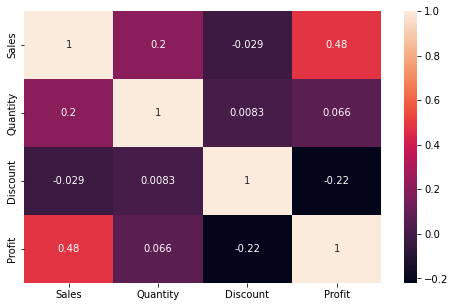

In [18]:
# correlation between the different columns
# their is positive correlation between the sales and profit and negative correlation between the profit and discount
plt.figure(figsize=[8,5])
sns.heatmap(data3.corr(),annot=True)

In [19]:
# checking the unique values in each object type column
for i in data3.columns:
    if data3[i].dtypes == 'O':
        print("Column Name:",i)
        print("Number of unique values:",data[i].nunique())
        print(data3[i].unique())
        print("*"*100)

Column Name: Ship Mode
Number of unique values: 4
['Second Class' 'Standard Class' 'First Class' 'Same Day']
****************************************************************************************************
Column Name: Segment
Number of unique values: 3
['Consumer' 'Corporate' 'Home Office']
****************************************************************************************************
Column Name: City
Number of unique values: 531
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' '

## Analysis

In [51]:
data3.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Category wise

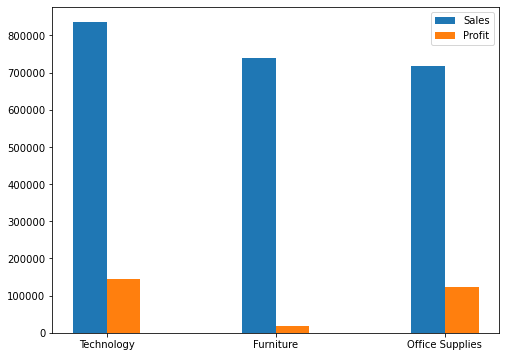

In [21]:
w = 0.2
plt.figure(figsize=(8,6))
sales_data_by_category = data3.groupby("Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False)
sales = np.arange(len(sales_data_by_category.index))
profit = [i+w for i in sales]
quantity = [j+w for j in profit]
plt.bar(sales,sales_data_by_category["Sales"],label="Sales",width=w)
plt.bar(profit,sales_data_by_category["Profit"],label="Profit",width=w)
plt.xticks(sales+0.1,sales_data_by_category.index)
plt.legend()
plt.show()

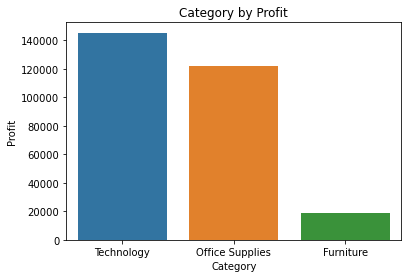

In [48]:
# highest profit in the technology category
profit_data_category = data3.groupby("Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Profit",ascending=False)
sns.barplot(data=profit_data_category,x=profit_data_category.index,y=profit_data_category["Profit"])
plt.xlabel("Category")
plt.ylabel("Profit")
plt.title("Category by Profit")
plt.show()

In [23]:
# highest sales is in the technology category
# sales_data_by_category = data3.groupby("Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False)
# sns.barplot(data=sales_data_by_category,x=sales_data_by_category.index,y=sales_data_by_category["Sales"])
# plt.xlabel("Category")
# plt.ylabel("Sales")
# plt.title("Category by Sales")
# plt.show()

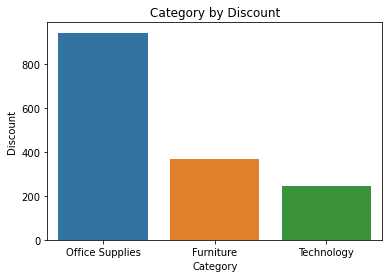

In [52]:
discount_data_by_category = data3.groupby("Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Discount",ascending=False)
sns.barplot(data=discount_data_by_category,x=discount_data_by_category.index,y=discount_data_by_category["Discount"])
plt.xlabel("Category")
plt.ylabel("Discount")
plt.title("Category by Discount")
plt.show()

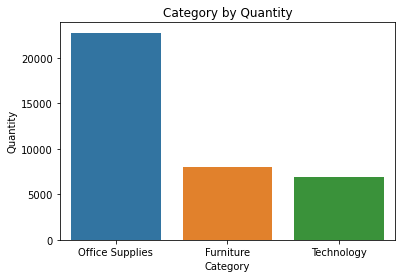

In [26]:
quantity_data_by_category = data3.groupby("Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Quantity",ascending=False)
sns.barplot(data=quantity_data_by_category,x=quantity_data_by_category.index,y=quantity_data_by_category["Quantity"])
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Category by Quantity")
plt.show()

#### Region Wise

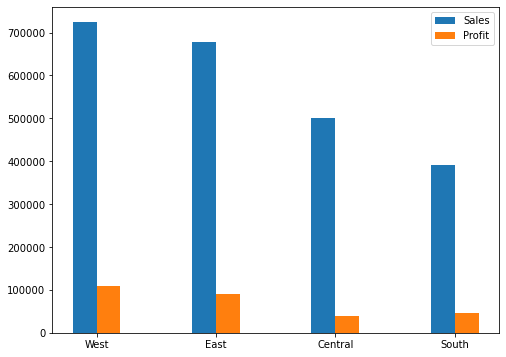

In [54]:
w = 0.2
plt.figure(figsize=(8,6))
sales_data_by_region = data3.groupby("Region")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False)
sales = np.arange(len(sales_data_by_region.index))
profit = [i+w for i in sales]
plt.bar(sales,sales_data_by_region["Sales"],label="Sales",width=w)
plt.bar(profit,sales_data_by_region["Profit"],label="Profit",width=w)
plt.xticks(sales+0.1,sales_data_by_region.index)
plt.legend()
plt.show()

In [55]:
# highest sales in the west region
# sales_data_by_region = data3.groupby("Region")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False)
# sns.barplot(data=sales_data_by_region,x=sales_data_by_region.index,y=sales_data_by_region["Sales"])
# plt.xlabel("Region")
# plt.ylabel("Sales")
# plt.title("Region by Sales")
# plt.show()

In [56]:
# west region has the highest profit
# profit_data_by_region = data3.groupby("Region")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Profit",ascending=False)
# sns.barplot(data=profit_data_by_region,x=profit_data_by_region.index,y=profit_data_by_region["Profit"])
# plt.xlabel("Region")
# plt.ylabel("Profit")
# plt.title("Region by Profit")
# plt.show()

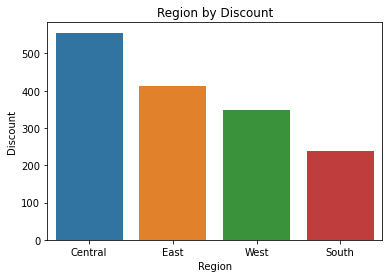

In [29]:
discount_data_by_region = data3.groupby("Region")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Discount",ascending=False)
sns.barplot(data=discount_data_by_region,x=discount_data_by_region.index,y=discount_data_by_region["Discount"])
plt.xlabel("Region")
plt.ylabel("Discount")
plt.title("Region by Discount")
plt.show()

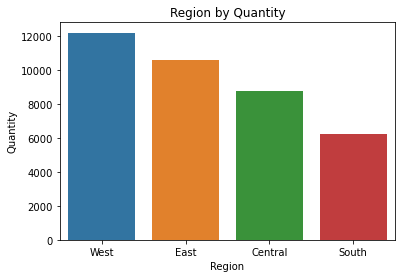

In [53]:
quantity_data_by_region = data3.groupby("Region")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Quantity",ascending=False)
sns.barplot(data=quantity_data_by_region,x=quantity_data_by_region.index,y=quantity_data_by_region["Quantity"])
plt.xlabel("Region")
plt.ylabel("Quantity")
plt.title("Region by Quantity")
plt.show()

#### Sub Category Wise

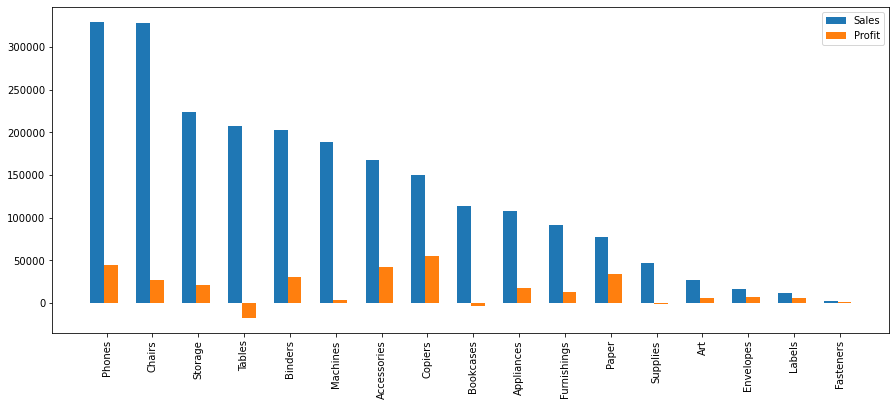

In [62]:
w = 0.3
plt.figure(figsize=(15,6))
sales_data_by_subcategory = data3.groupby("Sub-Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False)
sales = np.arange(len(sales_data_by_subcategory.index))
profit = [i+w for i in sales]
plt.bar(sales,sales_data_by_subcategory["Sales"],label="Sales",width=w)
plt.bar(profit,sales_data_by_subcategory["Profit"],label="Profit",width=w)
plt.xticks(sales+0.2,sales_data_by_subcategory.index,rotation=90)
plt.legend()
plt.show()

In [63]:
# highest sales in the phone and chair sub-category
# sales_data_by_subcategory = data3.groupby("Sub-Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False)
# plt.figure(figsize=(18,5))
# sns.barplot(data=sales_data_by_subcategory,x=sales_data_by_subcategory.index,y=sales_data_by_subcategory["Sales"])
# plt.xlabel("Sub-Category")
# plt.ylabel("Sales")
# plt.title("Sub-Category by Sales")
# plt.show()

In [64]:
# profit_data_by_subcategory = data3.groupby("Sub-Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Profit",ascending=False)
# plt.figure(figsize=(18,5))
# sns.barplot(data=profit_data_by_subcategory,x=profit_data_by_subcategory.index,y=profit_data_by_subcategory["Profit"])
# plt.xlabel("Sub-Category")
# plt.ylabel("Profit")
# plt.title("Sub-Category by Profit")
# plt.show()

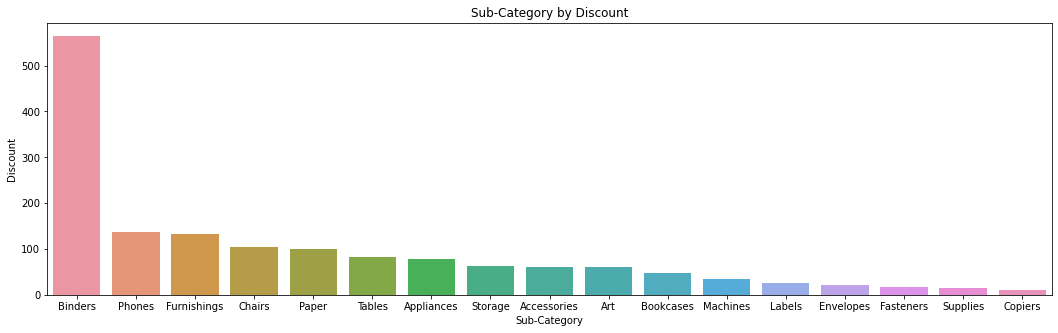

In [32]:
discount_data_by_subcategory = data3.groupby("Sub-Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Discount",ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(data=discount_data_by_subcategory,x=discount_data_by_subcategory.index,y=discount_data_by_subcategory["Discount"])
plt.xlabel("Sub-Category")
plt.ylabel("Discount")
plt.title("Sub-Category by Discount")
plt.show()

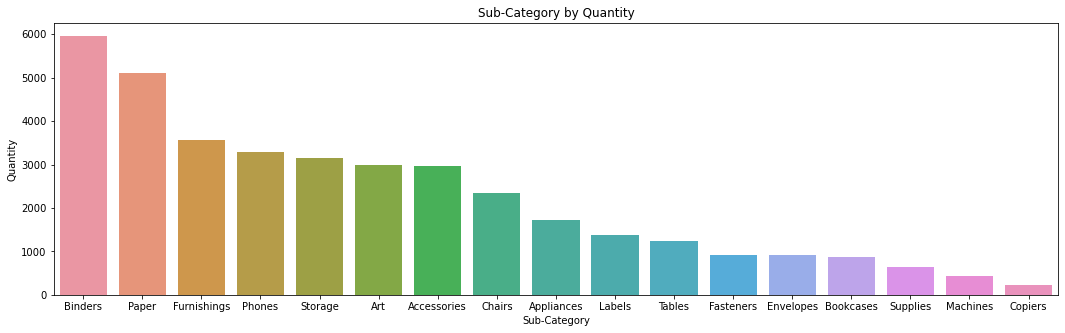

In [33]:
Quantity_data_by_subcategory = data3.groupby("Sub-Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Quantity",ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(data=Quantity_data_by_subcategory,x=Quantity_data_by_subcategory.index,y=Quantity_data_by_subcategory["Quantity"])
plt.xlabel("Sub-Category")
plt.ylabel("Quantity")
plt.title("Sub-Category by Quantity")
plt.show()

#### Segment wise

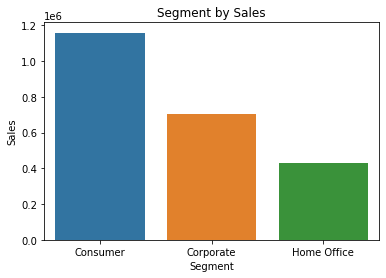

In [34]:
# highest sales in the consumer segment
sales_data_by_segment = data3.groupby("Segment")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False)
sns.barplot(data=sales_data_by_segment,x=sales_data_by_segment.index,y=sales_data_by_segment["Sales"])
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.title("Segment by Sales")
plt.show()

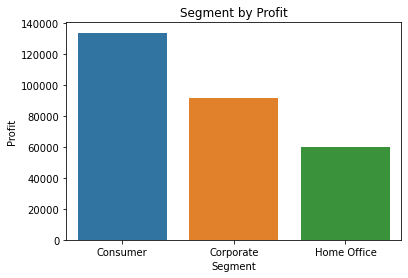

In [35]:
profit_data_by_segment = data3.groupby("Segment")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Profit",ascending=False)
sns.barplot(data=profit_data_by_segment,x=profit_data_by_segment.index,y=profit_data_by_segment["Profit"])
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.title("Segment by Profit")
plt.show()

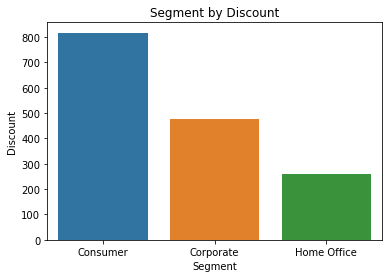

In [36]:
discount_data_by_segment = data3.groupby("Segment")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Discount",ascending=False)
sns.barplot(data=discount_data_by_segment,x=discount_data_by_segment.index,y=discount_data_by_segment["Discount"])
plt.xlabel("Segment")
plt.ylabel("Discount")
plt.title("Segment by Discount")
plt.show()

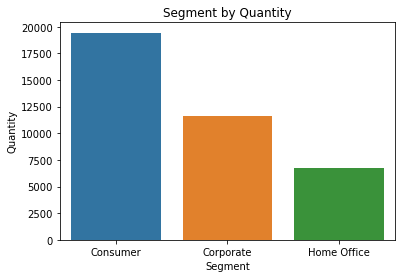

In [67]:
quantity_data_by_segment = data3.groupby("Segment")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Quantity",ascending=False)
sns.barplot(data=quantity_data_by_segment,x=quantity_data_by_segment.index,y=quantity_data_by_segment["Quantity"])
plt.xlabel("Segment")
plt.ylabel("Quantity")
plt.title("Segment by Quantity")
plt.show()

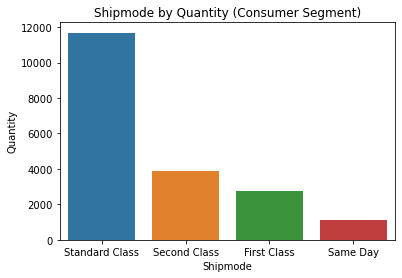

In [74]:
consumer_segment = data3[data3["Segment"]=="Consumer"]
quantity_by_shipmode_consumer_segment = consumer_segment.groupby("Ship Mode")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Quantity",ascending=False)
sns.barplot(data=quantity_by_shipmode_consumer_segment,x=quantity_by_shipmode_consumer_segment.index,y=quantity_by_shipmode_consumer_segment["Quantity"])
plt.xlabel("Shipmode")
plt.ylabel("Quantity")
plt.title("Shipmode by Quantity (Consumer Segment)")
plt.show()

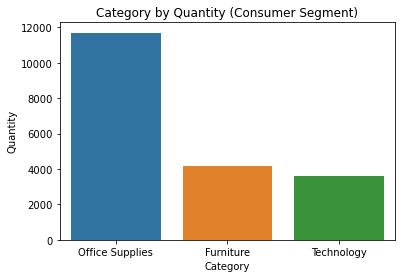

In [77]:
consumer_segment = data3[data3["Segment"]=="Consumer"]
quantity_by_category_consumer_segment = consumer_segment.groupby("Category")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Quantity",ascending=False)
sns.barplot(data=quantity_by_category_consumer_segment,x=quantity_by_category_consumer_segment.index,y=quantity_by_category_consumer_segment["Quantity"])
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Category by Quantity (Consumer Segment)")
plt.show()

#### Ship Mode Wise

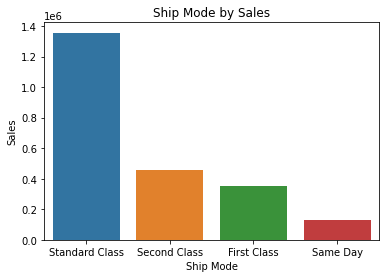

In [37]:
# standard ship mode has the highest sales
sales_data_by_shipmode = data3.groupby("Ship Mode")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False)
sns.barplot(data=sales_data_by_shipmode,x=sales_data_by_shipmode.index,y=sales_data_by_shipmode["Sales"])
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.title("Ship Mode by Sales")
plt.show()

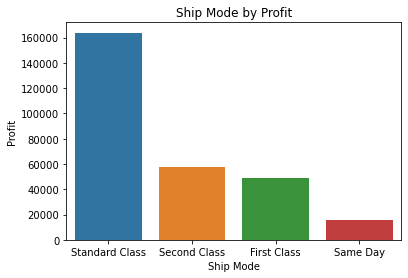

In [38]:
profit_data_by_shipmode = data3.groupby("Ship Mode")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Profit",ascending=False)
sns.barplot(data=profit_data_by_shipmode,x=profit_data_by_shipmode.index,y=profit_data_by_shipmode["Profit"])
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.title("Ship Mode by Profit")
plt.show()

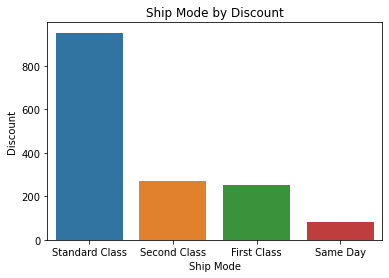

In [65]:
discount_data_by_shipmode = data3.groupby("Ship Mode")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Discount",ascending=False)
sns.barplot(data=discount_data_by_shipmode,x=discount_data_by_shipmode.index,y=discount_data_by_shipmode["Discount"])
plt.xlabel("Ship Mode")
plt.ylabel("Discount")
plt.title("Ship Mode by Discount")
plt.show()

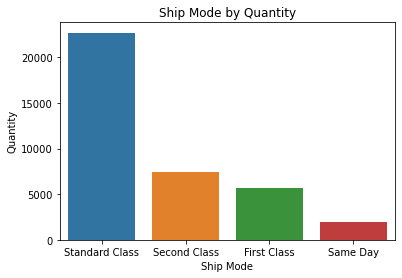

In [66]:
Quantity_data_by_shipmode = data3.groupby("Ship Mode")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Quantity",ascending=False)
sns.barplot(data=Quantity_data_by_shipmode,x=Quantity_data_by_shipmode.index,y=Quantity_data_by_shipmode["Quantity"])
plt.xlabel("Ship Mode")
plt.ylabel("Quantity")
plt.title("Ship Mode by Quantity")
plt.show()

#### State wise

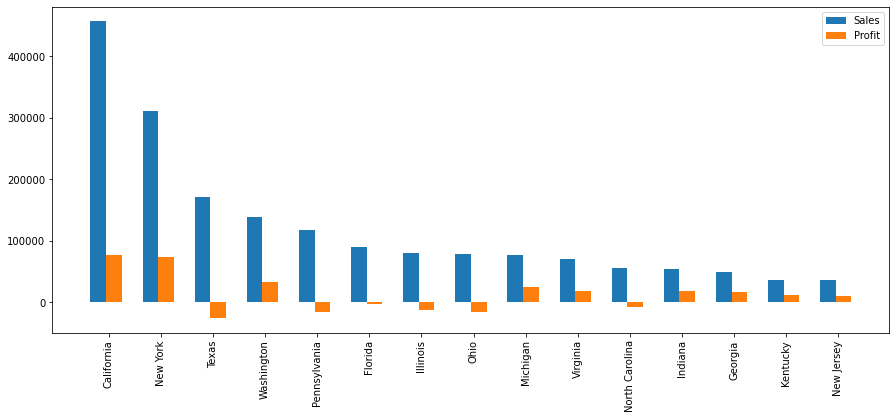

In [81]:
w = 0.3
plt.figure(figsize=(15,6))
sales_data_by_state = data3.groupby("State")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False).head(15)
sales = np.arange(len(sales_data_by_state.index))
profit = [i+w for i in sales]
plt.bar(sales,sales_data_by_state["Sales"],label="Sales",width=w)
plt.bar(profit,sales_data_by_state["Profit"],label="Profit",width=w)
plt.xticks(sales+0.2,sales_data_by_state.index,rotation=90)
plt.legend()
plt.show()

In [82]:
# california state has the highest sales
# sales_data_by_state = data3.groupby("State")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False).head(15)
# plt.figure(figsize=(18,5))
# sns.barplot(data=sales_data_by_state,x=sales_data_by_state.index,y=sales_data_by_state["Sales"])
# plt.xlabel("State")
# plt.ylabel("Sales")
# plt.title("State by Sales")
# plt.show()

In [83]:
# profit_data_by_state = data3.groupby("State")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Profit",ascending=False).head(55)
# plt.figure(figsize=(18,5))
# sns.barplot(data=profit_data_by_state,x=profit_data_by_state.index,y=profit_data_by_state["Profit"])
# plt.xlabel("State")
# plt.ylabel("Profit")
# plt.title("State by Profit")
# plt.xticks(rotation=90)
# plt.show()

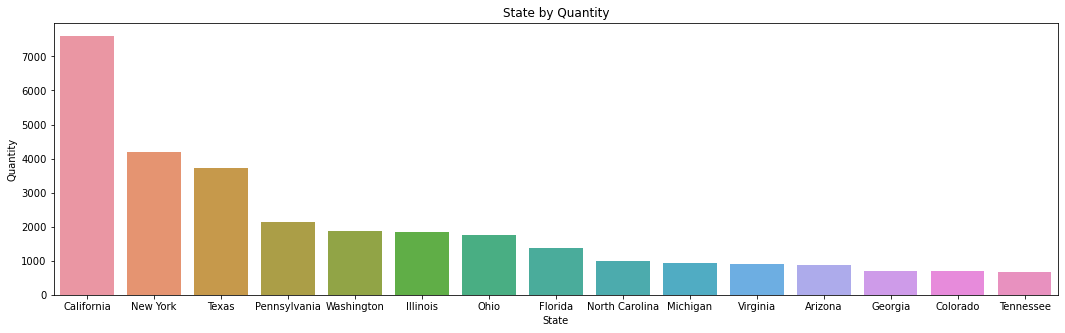

In [41]:
quantity_data_by_state = data3.groupby("State")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Quantity",ascending=False).head(15)
plt.figure(figsize=(18,5))
sns.barplot(data=quantity_data_by_state,x=quantity_data_by_state.index,y=quantity_data_by_state["Quantity"])
plt.xlabel("State")
plt.ylabel("Quantity")
plt.title("State by Quantity")
plt.show()

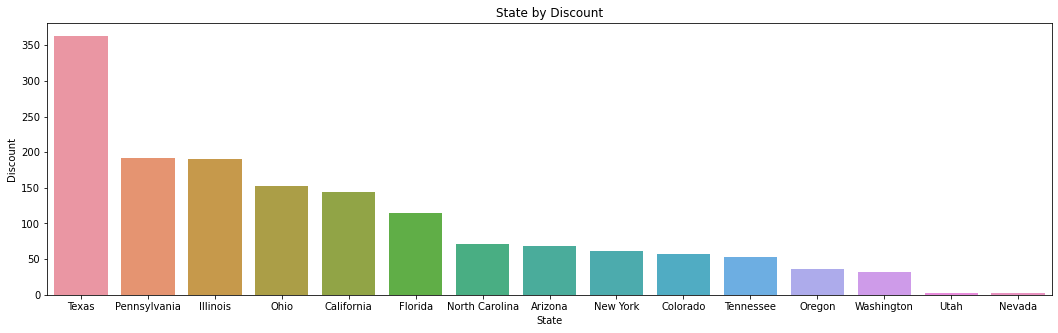

In [42]:
discount_data_by_state = data3.groupby("State")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Discount",ascending=False).head(15)
plt.figure(figsize=(18,5))
sns.barplot(data=discount_data_by_state,x=discount_data_by_state.index,y=discount_data_by_state["Discount"])
plt.xlabel("State")
plt.ylabel("Discount")
plt.title("State by Discount")
plt.show()

#### City Wise

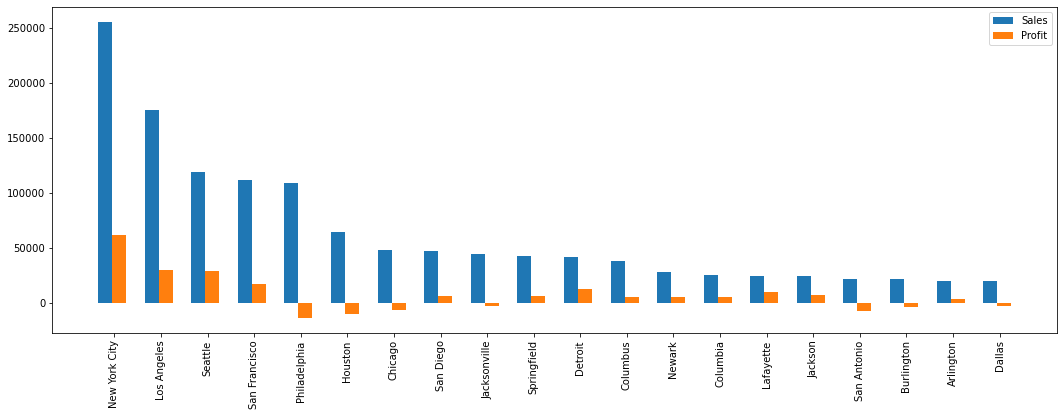

In [87]:
w = 0.3
plt.figure(figsize=(18,6))
sales_data_by_city = data3.groupby("City")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False).head(20)
sales = np.arange(len(sales_data_by_city.index))
profit = [i+w for i in sales]
plt.bar(sales,sales_data_by_city["Sales"],label="Sales",width=w)
plt.bar(profit,sales_data_by_city["Profit"],label="Profit",width=w)
plt.xticks(sales+0.2,sales_data_by_city.index,rotation=90)
plt.legend()
plt.show()

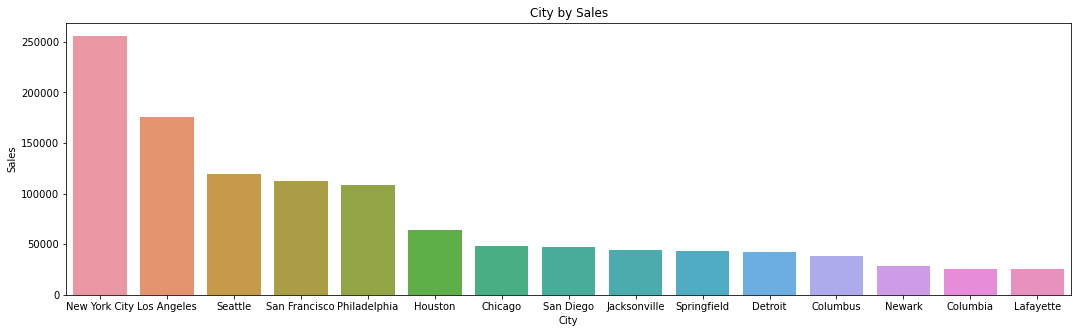

In [43]:
sales_data_by_city = data3.groupby("City")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Sales",ascending=False).head(15)
plt.figure(figsize=(18,5))
sns.barplot(data=sales_data_by_city,x=sales_data_by_city.index,y=sales_data_by_city["Sales"])
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("City by Sales")
plt.show()

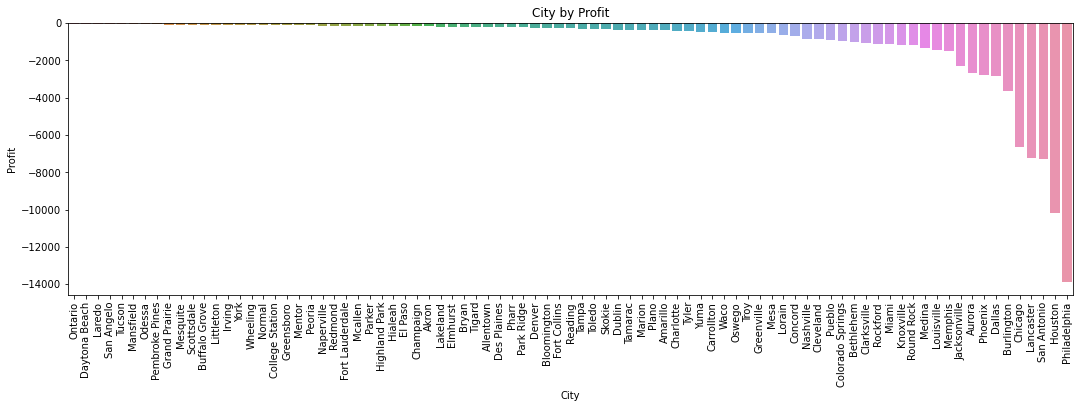

In [44]:
profit_data_by_city = data3.groupby("City")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Profit",ascending=False).tail(85)
plt.figure(figsize=(18,5))
sns.barplot(data=profit_data_by_city,x=profit_data_by_city.index,y=profit_data_by_city["Profit"])
plt.xlabel("City")
plt.ylabel("Profit")
plt.title("City by Profit")
plt.xticks(rotation=90)
plt.show()

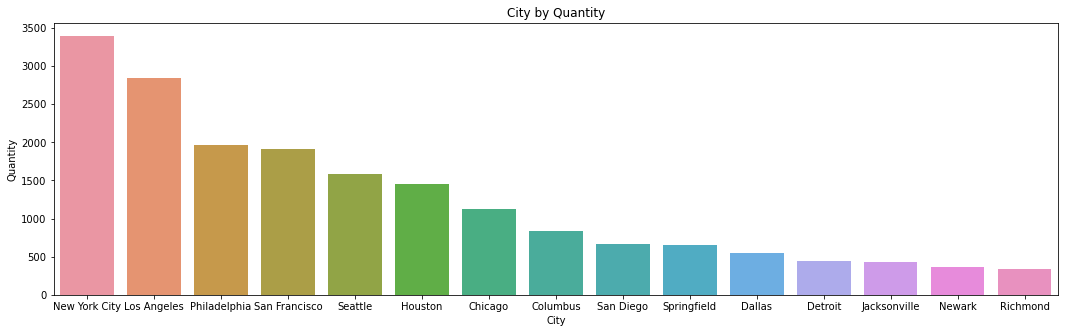

In [45]:
quantity_data_by_city = data3.groupby("City")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Quantity",ascending=False).head(15)
plt.figure(figsize=(18,5))
sns.barplot(data=quantity_data_by_city,x=quantity_data_by_city.index,y=quantity_data_by_city["Quantity"])
plt.xlabel("City")
plt.ylabel("Quantity")
plt.title("City by Quantity")
plt.show()

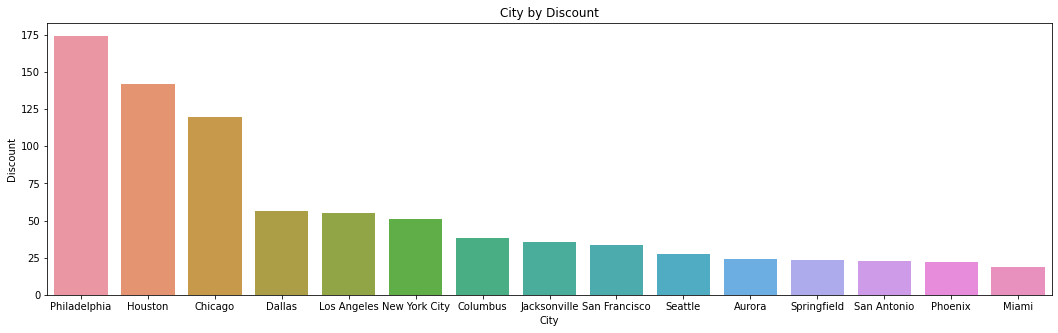

In [46]:
discount_data_by_city = data3.groupby("City")["Sales","Profit","Quantity","Discount"].sum().sort_values(by="Discount",ascending=False).head(15)
plt.figure(figsize=(18,5))
sns.barplot(data=discount_data_by_city,x=discount_data_by_city.index,y=discount_data_by_city["Discount"])
plt.xlabel("City")
plt.ylabel("Discount")
plt.title("City by Discount")
plt.show()

## Conclusion
#### 1-Focus sales efforts on technology and office supplies to maximize profitability.
#### 2-Decrease the discount amount in the central region to boost profit margins.
#### 3-Consider removing the non-profitable subcategories like tables and bookcases from the store.
#### 4-Cater to consumer segment preferences by prioritizing standard shipping and promoting office supply products.
#### 5-Allocate resources and marketing efforts to capitalize on the most profitable states and cities.
#### 6-Decrease discount amounts in Texas and Pennsylvania to turn their good sales into positive profit margins.
#### 7-Optimize profitability in Philadelphia and Houston by reducing discount amounts in these cities.


## Tableau Dashboard link
###### https://public.tableau.com/views/SalesDataAnalysis_17042739086040/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link